使用求导方法得到最优解

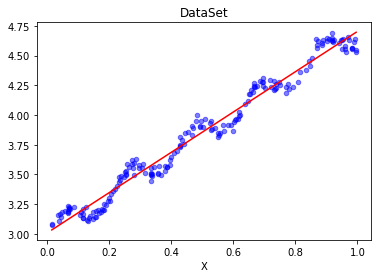

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t')) - 1
    xArr = []; yArr = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        xArr.append(lineArr)
        yArr.append(float(curLine[-1]))
    return np.mat(xArr), np.mat(yArr).T

def standRegres(xMat,yMat):
    return (xMat.T * xMat).I * xMat.T * yMat

def plotRegression():
    X_train, y_train = loadDataSet('dataSet_03.txt')
    ws = standRegres(X_train, y_train)
    xCopy = X_train.copy()
    xCopy.sort(0)
    yHat = xCopy * ws
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(xCopy[:, 1], yHat, c = 'red')
    ax.scatter(X_train[:,1].flatten().A[0], y_train.flatten().A[0], s = 20, c = 'blue',alpha = .5)
    plt.title('DataSet')
    plt.xlabel('X')
    plt.show()

if __name__ == '__main__':
    plotRegression()

<ipython-input-12-bad02e47c31c>:36: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs0_title_text = axs[0].set_title(u'局部加权回归曲线,k=1.0',FontProperties=font)
<ipython-input-12-bad02e47c31c>:37: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs1_title_text = axs[1].set_title(u'局部加权回归曲线,k=0.01',FontProperties=font)
<ipython-input-12-bad02e47c31c>:38: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs2_title_text = axs[2].set_title(u'局部加权回归曲线,k=0.003',FontProperties=font)


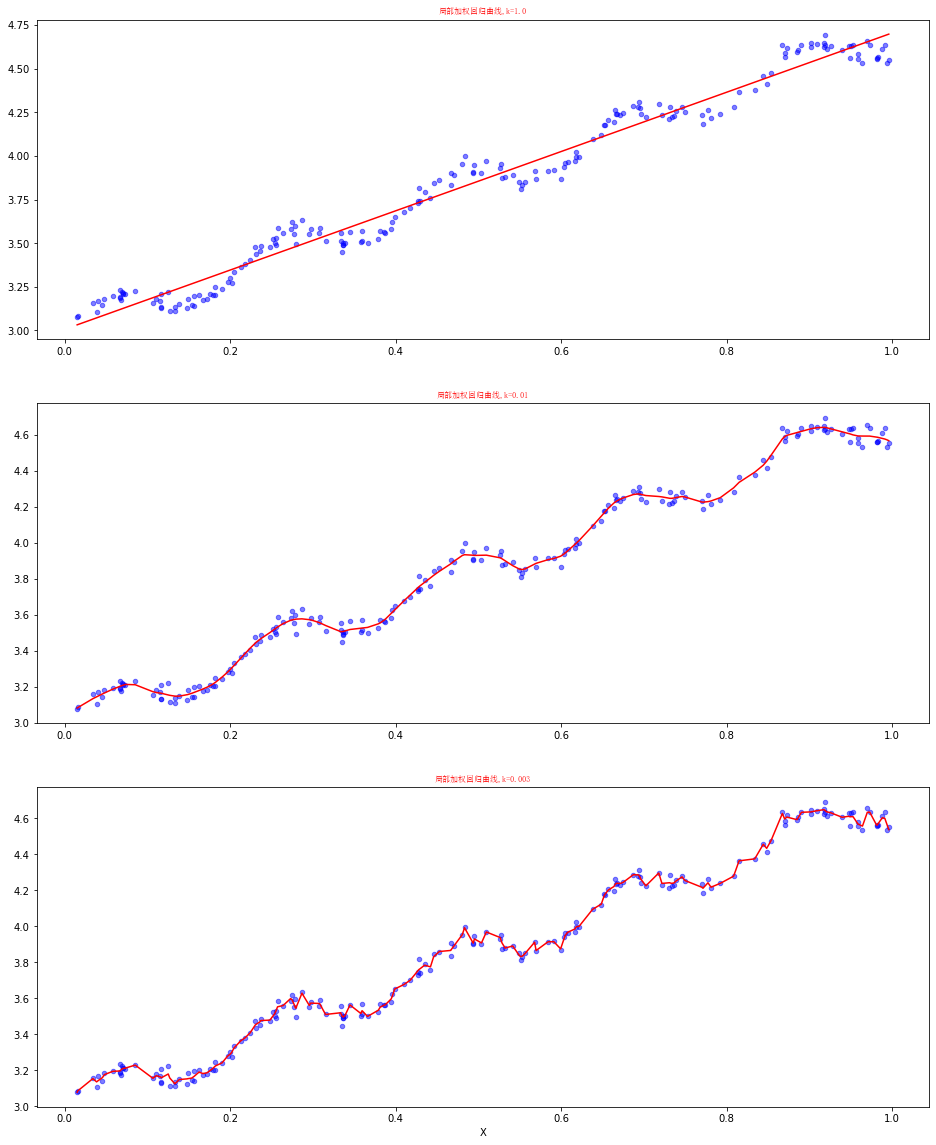

In [12]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np

def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t')) - 1
    xArr = []; yArr = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        xArr.append(lineArr)
        yArr.append(float(curLine[-1]))
    return xArr, yArr

def plotlwlrRegression():
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    xArr, yArr = loadDataSet('dataSet_03.txt')
    yHat_1 = lwlrTest(xArr, xArr, yArr, 1.0)                             #根据局部加权线性回归计算yHat
    yHat_2 = lwlrTest(xArr, xArr, yArr, 0.01)
    yHat_3 = lwlrTest(xArr, xArr, yArr, 0.003)
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    srtInd = xMat[:, 1].argsort(0)
    xSort = xMat[srtInd][:,0,:]
    fig, axs = plt.subplots(nrows=3, ncols=1,sharex=False, sharey=False, figsize=(16, 20))                                        
    axs[0].plot(xSort[:, 1], yHat_1[srtInd], c = 'red')
    axs[1].plot(xSort[:, 1], yHat_2[srtInd], c = 'red')
    axs[2].plot(xSort[:, 1], yHat_3[srtInd], c = 'red')
    axs[0].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue', alpha = .5)
    axs[1].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue', alpha = .5)
    axs[2].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue', alpha = .5)
    #设置标题,x轴label,y轴label
    axs0_title_text = axs[0].set_title(u'局部加权回归曲线,k=1.0',FontProperties=font)
    axs1_title_text = axs[1].set_title(u'局部加权回归曲线,k=0.01',FontProperties=font)
    axs2_title_text = axs[2].set_title(u'局部加权回归曲线,k=0.003',FontProperties=font)
    plt.setp(axs0_title_text, size=8, weight='bold', color='red')  
    plt.setp(axs1_title_text, size=8, weight='bold', color='red')  
    plt.setp(axs2_title_text, size=8, weight='bold', color='red')  
    plt.xlabel('X')
    plt.show()

def lwlr(testPoint, xArr, yArr, k = 1.0):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    m = np.shape(xMat)[0]
    weights = np.mat(np.eye((m)))                                        #创建权重对角矩阵
    for j in range(m):                                                   #遍历数据集计算每个样本的权重
        diffMat = testPoint - xMat[j, :]                                 
        weights[j, j] = np.exp(diffMat * diffMat.T/(-2.0 * k**2))
    xTx = xMat.T * (weights * xMat)                                        
    if np.linalg.det(xTx) == 0.0:
        print("矩阵为奇异矩阵,不能求逆")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

def lwlrTest(testArr, xArr, yArr, k=1.0):  
    m = np.shape(testArr)[0]
    yHat = np.zeros(m)    
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat

if __name__ == '__main__':
    plotlwlrRegression()

In [2]:
import numpy as np
print(np.mat(np.eye((10))))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
